In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

path = '/Users/dangloan/Documents/learning_analytics/project/'

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_colwidth', -1)

In [3]:
df = pd.read_csv(path + '3_data/clothing_review/Womens Clothing E-Commerce Reviews.csv')

In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.columns =['Clothing_ID',
 'Age',
 'Title',
 'Review_Text',
 'Rating',
 'Recommended_IND',
 'Positive_Feedback_Count',
 'Division_Name',
 'Department_Name',
 'Class_Name']

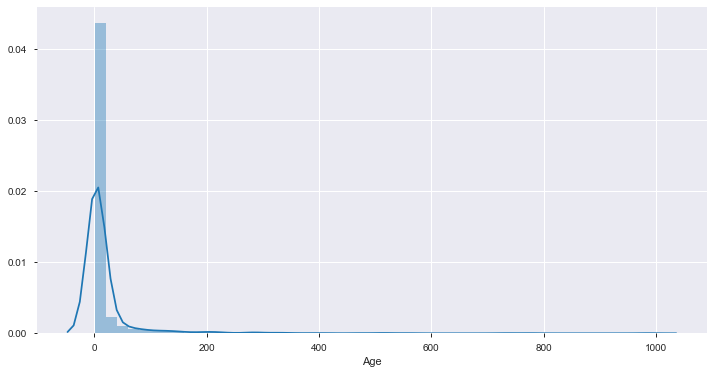

In [76]:
# import matplotlib.pyplot as plt
import seaborn as sns
# a = df.groupby('Clothing_ID')['Age'].count().reset_index()
b= a.sort_values(by='Age',ascending=False)
# b['Age'] = b['Age'].astype(int)
b['Clothing_ID'] = b['Clothing_ID'].astype(str)
# print(b['Age'].dtype)
# print(b['Clothing_ID'].dtype)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.distplot(a['Age'])

In [79]:
a.describe()

,Clothing_ID,Age
count,1177.000000,1177.000000
mean,607.383178,19.212404
std,346.219431,67.289499
min,1.000000,1.000000
25%,308.000000,1.000000
50%,610.000000,2.000000
75%,907.000000,7.000000
max,1205.000000,987.000000


In [24]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df)

In [25]:
profile

Number of variables,15
Number of observations,22613
Total Missing (%),0.9%
Total size in memory,2.6 MiB
Average record size in memory,120.0 B
Numeric,5
Categorical,5
Boolean,1
Date,0
Text (Unique),0
Rejected,1


In [6]:
#Clean data
#First remove duplicates
df[df.duplicated(keep=False)].sort_values(by='Clothing_ID')
df.drop_duplicates(keep='first',inplace=True)
df[df['Clothing_ID'] == 862]

,Clothing_ID,Age,Title,Review_Text,Rating,Recommended_IND,Positive_Feedback_Count,Division_Name,Department_Name,Class_Name
39,862,59,NaN,Great casual top with flare. looks cute with grey pilcro stet jeans. flattering with peplum in back. nice cut for shoulders and neckline.,5,1,0,General,Tops,Knits
40,862,47,NaN,"Pretty and unique. great with jeans or i have worn it to work with slacks and heels. the colors, print, and embroidery are lovely. reasonably priced!",4,1,1,General,Tops,Knits
41,862,40,NaN,"This is a beautiful top. it's unique and not so ordinary. i bought my usual medium and i found that it fits tight across my chest. although i had a baby this year and i am nursing, so that could be why. if i bought again i would size up.",5,1,0,General,Tops,Knits
44,862,48,Beautiful!,"Tried this on today at my local retailer and had to have it. it is so comfortable and flattering. it's too bad the picture online has the model tucking it into the skirt because you can't see the ruching across the front. a little dressier alternative to a plain tee and reasonably priced for retailer. 5'8"""" and i generally wear a 6, the small fit well. will probably be back for the black!",5,1,9,General,Tops,Knits
45,862,43,Love the two tone design,I bought this item from online... the fit on the model looked a little loose but when i got mine it seemed a bit tight! so i took it back to the store & ordered a larger size. for the sale price this is a great top.,4,1,0,General,Tops,Knits
46,862,40,NaN,I love this top. i wear it all the time. the problem is that you can tell i wear it all the time as the fabric has started to fade. i'd still recommend it as it is so comfortable.,5,1,0,General,Tops,Knits
49,862,33,Love the embroidery!,"Really cute top! the embroidery on the collar & bib of this top is beautiful and unique, received lots of compliments & questions about where i got it. i'm rather busty up top and the medium fit well, a small probably would've fit better but it's still super adorable.",5,1,0,General,Tops,Knits
50,862,46,Cute for fall,"This is a cute top that can transition easily from summer to fall. it fits well, nice print and it's comfortable. i tried this on in the store, but did not purchase it because the color washed me out. this is not the best color for a blonde. would look much better on a brunette. if this was in a different color i most likely would have purchased it.",4,1,1,General,Tops,Knits
51,862,41,Love,"I absolutely love this bib tee! it's probably my favorite retailer purchase of all time. i'm 5'7"", 140 pounds and the small was a perfect fit for me. i typically wear either a s or m tops.",5,1,2,General,Tops,Knits
53,862,39,Flattering and comfortable,"Very soft and comfortable. the shirt has an unusual, asymmetrical seam that appears along the front, right-hand side of the garment. (the model is positioned so that you can't see this detail from the picture. i attached a picture that includes the front seam.) i actually like the seam - it creates more visual interest, and adds a little bit of ruching that helps hide my belly. the cowl neck is very well done - there are two layers that form the cowl, and i've found that it means wardrobe malfun",5,1,34,General,Tops,Knits


In [7]:
a = df.groupby('Class_Name').agg({'Rating': ['mean','count']}).reset_index()
a.columns = ['Class_Name','Rating_mean','Rating_count']
a.sort_values('Rating_mean',ascending=False)

,Class_Name,Rating_mean,Rating_count
1,Casual bottoms,4.500000,2
9,Layering,4.376712,146
7,Jeans,4.360384,1146
11,Lounge,4.301013,691
6,Jackets,4.295455,704
16,Sleep,4.285088,228
5,Intimates,4.279221,154
10,Legwear,4.278788,165
13,Pants,4.265850,1388
4,Fine gauge,4.260237,1099


Now, I would be curious to see what customers like and don't like in the high rating (Layering, Jeans, etc.) and lower-than-average rating (Trend, Dressees, Blouses)

In [ ]:
# Explore review review title with wordcloud
# Start with loading all necessary libraries
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

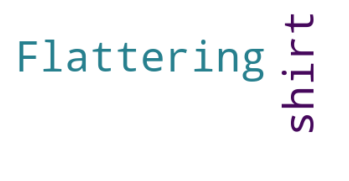

In [18]:
# Start with one review:
text = df.Title[4]

# Create and generate a word cloud image:
#wordcloud = WordCloud().generate(text)
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
# %% [code]
df1 = df[(df['Rating'] <= 2)]
df2 = df[(df['Rating'] == 5)]
df3 = df[(df['Rating'] <= 2) & (df['Class_Name'] == 'Blouses')]

There are 44462 words in the combination of all review.


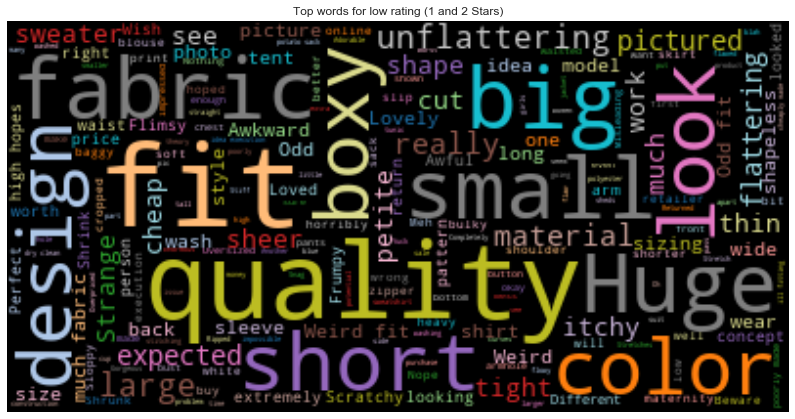

In [24]:
# %% [code]
text = " ".join(review for review in df1.Title.astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))

stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 3753646 words in the combination of all review.


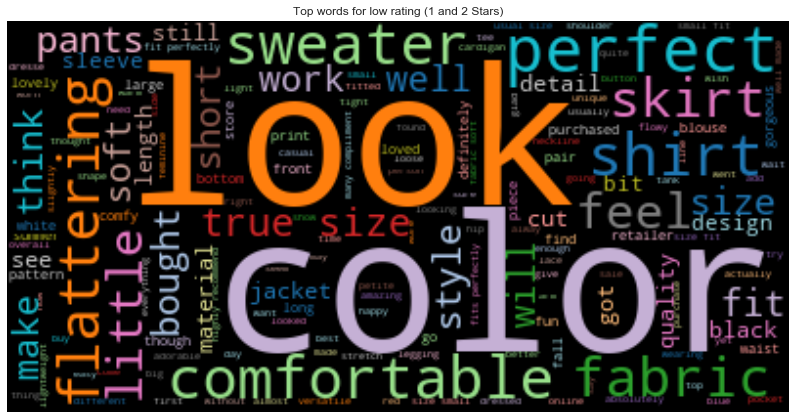

In [27]:
# %% [code]
text = " ".join(review for review in df2['Review_Text'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','sadly','nice','great','pretty','horrible',
                  'super','poor','sad','way','jeans','run','runs','pant',
                 'really','back','even','much','ordered','wear','one','tried'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="tab20").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()

There are 6332 words in the combination of all review.


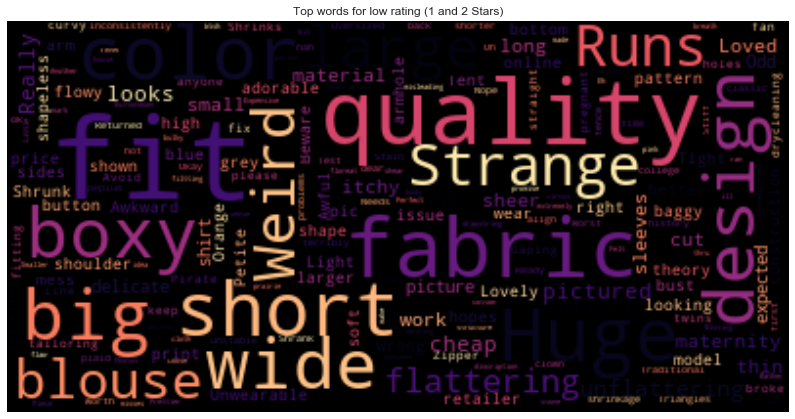

In [26]:
# %% [code]
text = " ".join(review for review in df3['Title'].astype(str))
print ("There are {} words in the combination of all review.".format(len(text)))
stopwords = set(STOPWORDS)
stopwords.update(['nan','cute','wanted','disappointed','disappointing',
                  'disappointment','beautiful','love','dress','terrible',
                  'good','top','bad','nice','great','pretty','horrible',
                  'super','poor','sad','way'])

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                     colormap="magma").generate(text) ##'Dark2'

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=[14,14])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Top words for low rating (1 and 2 Stars)')
plt.show()



##### I'm trying to see what people talk about in each product, i.e. if they like or dislike(rating average), then what they like/dislike about that product. I use topic modeling using LDA model. An expected result of the model would be that, for clothing id 1001, positive reviews talk most about quality, while negative reviews talk most about price, etc.

In [8]:
from langdetect import detect
#from tqdm import tqdm_notebook
#tqdm_notebook().pandas()

from tqdm import tqdm
tqdm.pandas()

In [9]:
df['Review_Text'] = df['Review_Text'].astype(str)

In [11]:
df['lang'] = df['Review_Text'].progress_map(detect)

100%|██████████| 23465/23465 [02:23<00:00, 163.02it/s]


In [17]:
df['lang'].value_counts()

KeyError: 'lang'

In [12]:
df = df.loc[df.lang=='en']

#### Tokenization

In [13]:
from nltk.tokenize import sent_tokenize
df['sentences'] = df['Review_Text'].progress_map(sent_tokenize)
df['sentences'].head(1).tolist()[0][:3] # Print the first 3 sentences of the 1st article

100%|██████████| 22613/22613 [00:04<00:00, 4669.81it/s]


['Absolutely wonderful - silky and sexy and comfortable']

In [14]:
df.Review_Text[0]

'Absolutely wonderful - silky and sexy and comfortable'

In [15]:
df.sentences[0]

['Absolutely wonderful - silky and sexy and comfortable']

In [16]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

df['tokens_sentences'] = df['sentences'].progress_map(lambda sentences: [word_tokenize(sentence) for sentence in sentences])
print(df['tokens_sentences'].head(1).tolist()[0][:3])

[nltk_data] Downloading package punkt to /Users/dangloan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 22613/22613 [00:16<00:00, 1338.85it/s]

[['Absolutely', 'wonderful', '-', 'silky', 'and', 'sexy', 'and', 'comfortable']]


#### Lemmatizing with POS tagging¶

In [20]:
from nltk import pos_tag
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/dangloan/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [21]:
df['POS_tokens'] = df['tokens_sentences'].progress_map(lambda tokens_sentences: [pos_tag(tokens) for tokens in tokens_sentences])
print(df['POS_tokens'].head(1).tolist()[0][:3])


100%|██████████| 22613/22613 [01:45<00:00, 213.50it/s]

[[('Absolutely', 'RB'), ('wonderful', 'JJ'), ('-', ':'), ('silky', 'NN'), ('and', 'CC'), ('sexy', 'NN'), ('and', 'CC'), ('comfortable', 'JJ')]]


In [22]:
print(df['POS_tokens'].head(1).tolist()[0][:3])

[[('Absolutely', 'RB'), ('wonderful', 'JJ'), ('-', ':'), ('silky', 'NN'), ('and', 'CC'), ('sexy', 'NN'), ('and', 'CC'), ('comfortable', 'JJ')]]


In [29]:
# %% [code]
from gensim import corpora, models

# list_of_list_of_tokens = [["a","b","c"], ["d","e","f"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

NameError: name 'list_of_list_of_tokens' is not defined